In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy

In [4]:
forest_fire=pd.read_csv('D:\\Support vector machines assign 17\\forestfires.csv')

In [5]:
forest_fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fire.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
print("Head:", forest_fire.head())


Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0     

In [6]:
forest_fire.drop('monthaug',axis='columns', inplace=True)
forest_fire.drop('monthdec',axis='columns', inplace=True)
forest_fire.drop('monthfeb',axis='columns', inplace=True)
forest_fire.drop('monthjan',axis='columns', inplace=True)
forest_fire.drop('monthjul',axis='columns', inplace=True)
forest_fire.drop('monthjun',axis='columns', inplace=True)
forest_fire.drop('monthmar',axis='columns', inplace=True)
forest_fire.drop('monthmay',axis='columns', inplace=True)
forest_fire.drop('monthnov',axis='columns', inplace=True)
forest_fire.drop('monthoct',axis='columns', inplace=True)
forest_fire.drop('monthsep',axis='columns', inplace=True)

In [7]:
forest_fire.drop('daysat',axis='columns', inplace=True)
forest_fire.drop('daysun',axis='columns', inplace=True)
forest_fire.drop('daythu',axis='columns', inplace=True)
forest_fire.drop('daytue',axis='columns', inplace=True)
forest_fire.drop('daywed',axis='columns', inplace=True)
forest_fire.drop('monthapr',axis='columns', inplace=True)

In [9]:
print("Head:", forest_fire.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon size_category  
0       0         small  
1       0         small  
2       0         small  
3       0         small  
4       0         small  


In [11]:
df=pd.get_dummies(forest_fire,columns=['size_category'], drop_first=True)


In [12]:
print(df.head())

   month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  size_category_small  
0       0                    1  
1       0                    1  
2       0                    1  
3       0                    1  
4       0                    1  


In [13]:
print("Shape:", forest_fire.shape)

Shape: (517, 14)


<AxesSubplot:xlabel='month'>

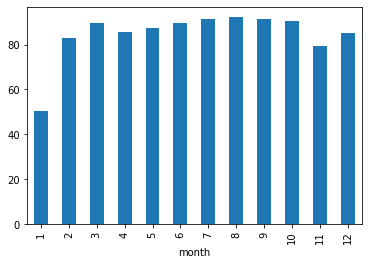

In [14]:
forest_fire.groupby('month').FFMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='day'>

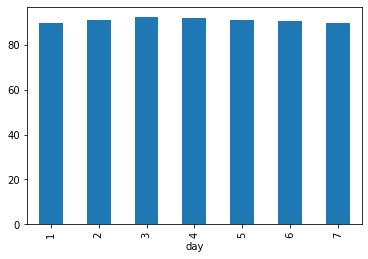

In [15]:
forest_fire.groupby('day').FFMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

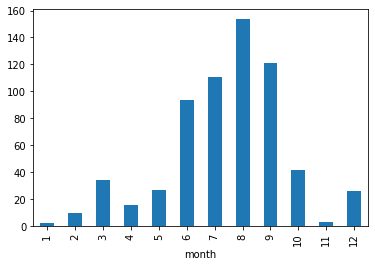

In [16]:
forest_fire.groupby('month').DMC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

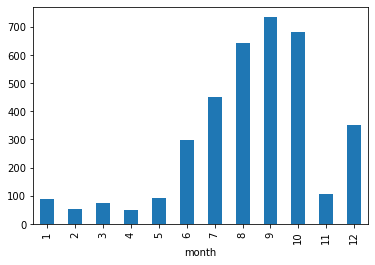

In [17]:
forest_fire.groupby('month').DC.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

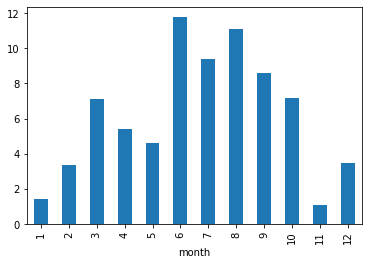

In [18]:
forest_fire.groupby('month').ISI.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

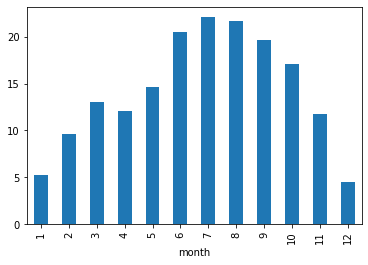

In [19]:
forest_fire.groupby('month').temp.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

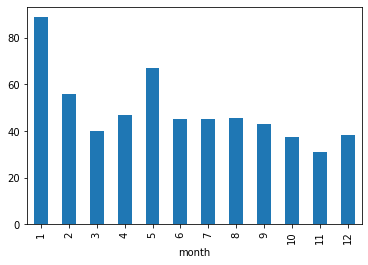

In [20]:
forest_fire.groupby('month').RH.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

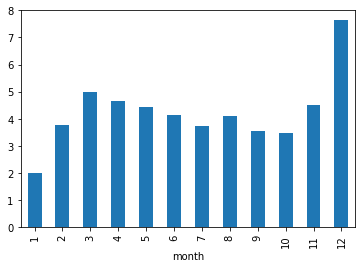

In [21]:
forest_fire.groupby('month').wind.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

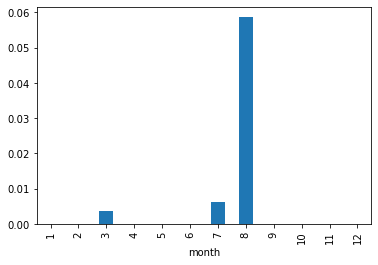

In [22]:
forest_fire.groupby('month').rain.mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

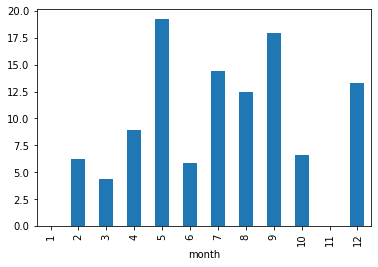

In [23]:
forest_fire.groupby('month').area.mean().plot(kind='bar')

# Setting up a Support Vector Machine

In [25]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = forest_fire[['FFMC', 'DMC']]

# Taking the labels (Income)
Y = forest_fire['month']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.6442307692307693


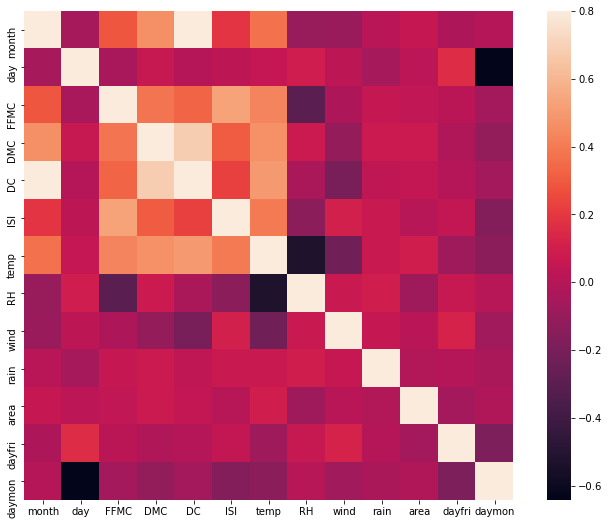

In [27]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = forest_fire.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


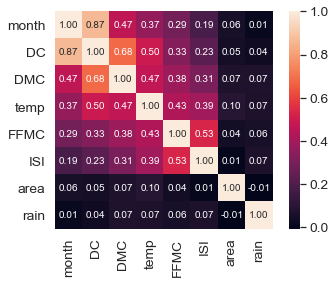

In [28]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'month')['month'].index
cm = np.corrcoef(forest_fire[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [29]:
# Taking only the features that is important for now
X = forest_fire[['DC', 'ISI']]

# Taking the labels (Income)
Y = forest_fire['month']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.8173076923076923


In [31]:
# Taking only the features that is important for now
X =  forest_fire[['FFMC', 'DMC', 'DC', 'temp']]

# Taking the labels (Income)
Y =  forest_fire['month']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7980769230769231


<AxesSubplot:xlabel='day'>

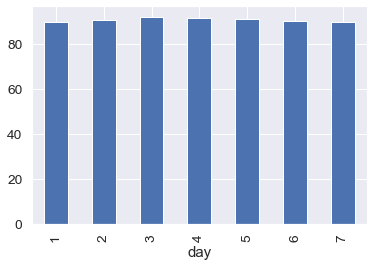

In [33]:
forest_fire.groupby('day').FFMC.mean().plot(kind='bar')